# Deteksi Komunitas

Implementasi deteksi komunitas dengan algoritma Louvain pada data pertemanan facebook.

Membaca dataset...
Informasi Graf:
 - Jumlah Node (User): 4039
 - Jumlah Edge (Pertemanan): 88234

Menjalankan Algoritma Louvain...
Nilai Modularitas: 0.8349
Jumlah Komunitas ditemukan: 16
Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'
Membuat visualisasi graf (mungkin memakan waktu)...


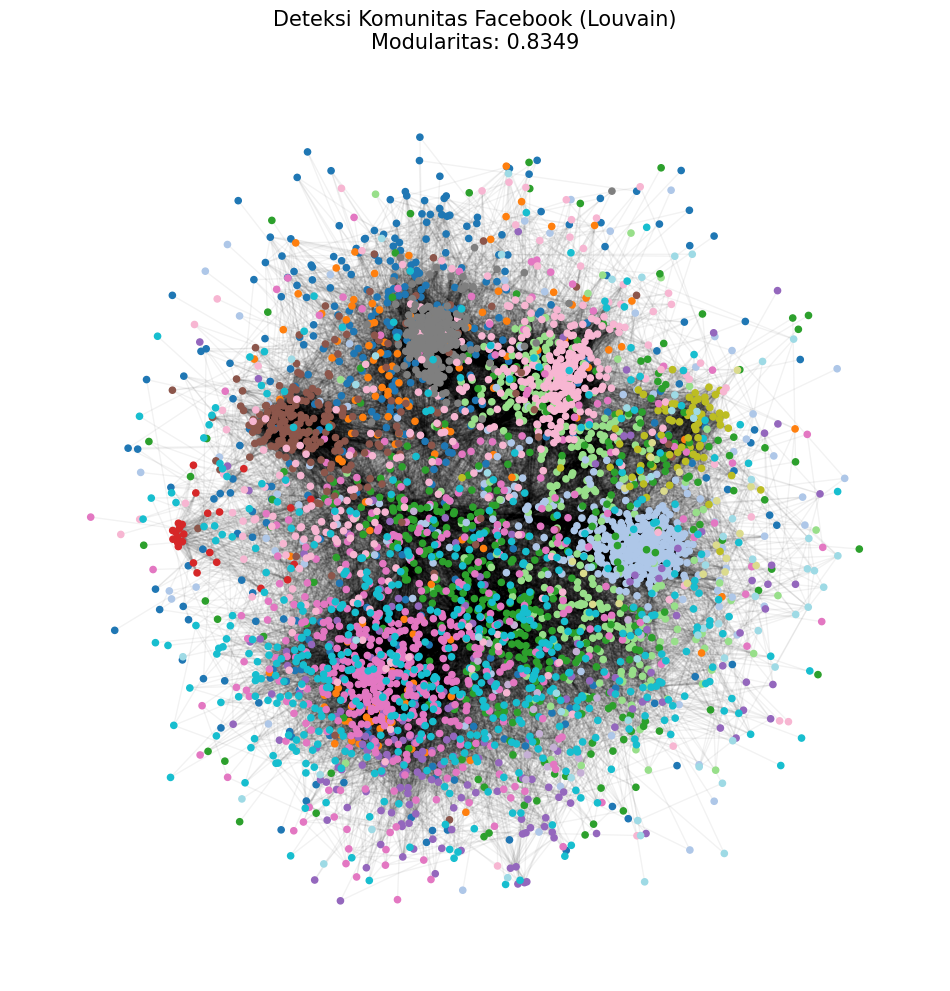

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def process_facebook_data(file_path):
    # 1. Load Data
    # Membaca dataset edge list (format: node1 node2)
    print("Membaca dataset...")
    G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

    print(f"Informasi Graf:")
    print(f" - Jumlah Node (User): {G.number_of_nodes()}")
    print(f" - Jumlah Edge (Pertemanan): {G.number_of_edges()}")

    # 2. Deteksi Komunitas (Algoritma Louvain)
    # Menggunakan implementasi Louvain bawaan NetworkX
    print("\nMenjalankan Algoritma Louvain...")
    communities = nx.community.louvain_communities(G, seed=42)

    # 3. Hitung Modularitas
    # Modularitas mengukur seberapa baik struktur komunitas tersebut
    modularity = nx.community.modularity(G, communities)
    print(f"Nilai Modularitas: {modularity:.4f}")
    print(f"Jumlah Komunitas ditemukan: {len(communities)}")

    # 4. Persiapan Visualisasi
    # Membuat dictionary untuk memetakan setiap node ke ID komunitasnya
    partition = {}
    for idx, comm in enumerate(communities):
        for node in comm:
            partition[node] = idx

    # Simpan hasil pembagian komunitas ke CSV
    df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community_ID'])
    df.to_csv('facebook_communities.csv', index=False)
    print("Hasil pembagian komunitas disimpan ke 'facebook_communities.csv'")

    # 5. Visualisasi Graf
    print("Membuat visualisasi graf (mungkin memakan waktu)...")
    plt.figure(figsize=(12, 12))

    # Menggunakan spring_layout untuk tata letak node
    pos = nx.spring_layout(G, k=0.1, iterations=20, seed=42)

    # Mewarnai node berdasarkan komunitasnya
    cmap = plt.get_cmap('tab20', len(communities))
    node_colors = [partition[n] for n in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size=20, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, alpha=0.05) # Transparansi tinggi agar tidak terlalu penuh

    plt.title(f"Deteksi Komunitas Facebook (Louvain)\nModularitas: {modularity:.4f}", fontsize=15)
    plt.axis('off')
    plt.savefig('facebook_community_graph.png')
    plt.show()

# Jalankan fungsi
# Pastikan file facebook_combined.txt ada di folder yang sama
process_facebook_data('facebook_combined.txt')

✨ Membaca dataset...
✅ Data Graf dimuat:
 - Jumlah Node (User): 4039
 - Jumlah Edge (Pertemanan): 88234

🔍 Menjalankan Algoritma Louvain (Seed=42)...
⭐ Nilai Modularitas: 0.8349
 - Jumlah Komunitas ditemukan: 16


--- 1. Daftar Anggota Tiap Komunitas ---

Komunitas 1 (Ukuran: 548 node):
  Anggota: [857, 862, 865, 868, 1085, 3437, 3438, 3439, 3440, 3441]...

Komunitas 2 (Ukuran: 535 node):
  Anggota: [2661, 2662, 2665, 2667, 2668, 2671, 2672, 2674, 2675, 2677]...

Komunitas 3 (Ukuran: 435 node):
  Anggota: [1024, 1026, 1027, 1028, 1029, 1034, 1038, 1039, 1040, 1046]...

Komunitas 4 (Ukuran: 431 node):
  Anggota: [1025, 1430, 34, 1064, 505, 1080, 1094, 1095, 424, 1113]...

Komunitas 5 (Ukuran: 423 node):
  Anggota: [2048, 2049, 2051, 2052, 2053, 2054, 2057, 2062, 2065, 2066]...

Komunitas 6 (Ukuran: 350 node):
  Anggota: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...

Komunitas 7 (Ukuran: 324 node):
  Anggota: [1032, 1035, 1036, 1037, 1041, 1042, 1044, 1051, 1052, 1060]...

Komunitas 8 (Ukuran: 237 n

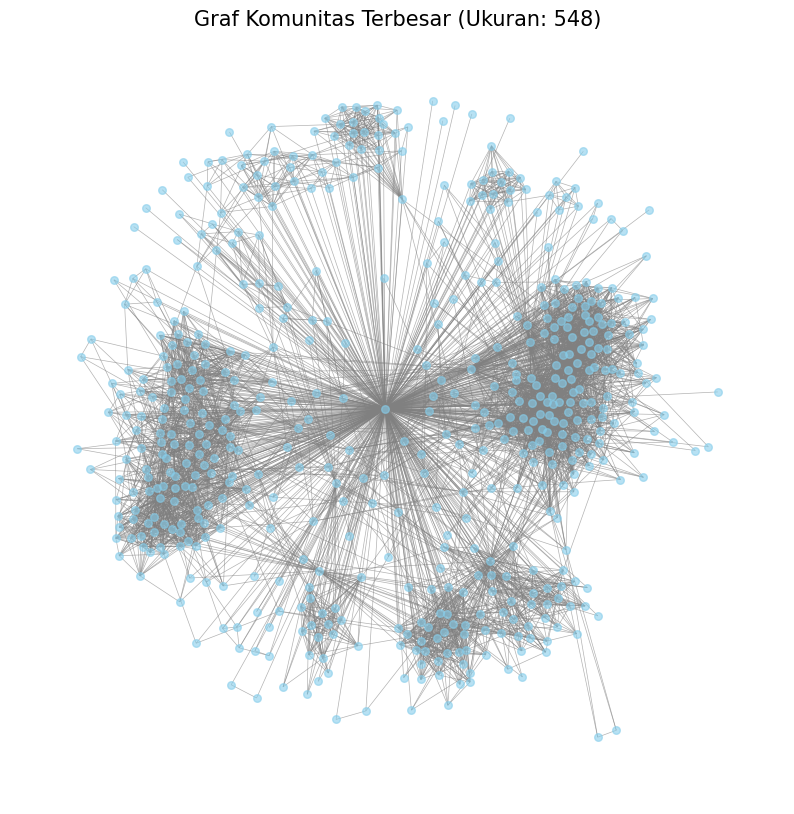

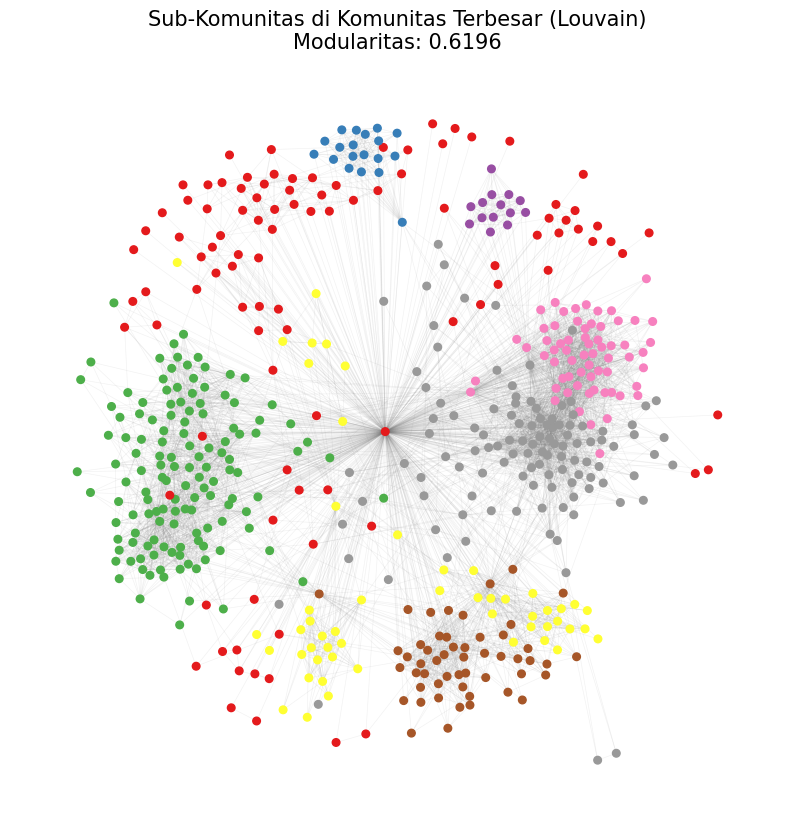



[INFO] Proses selesai. Periksa file PNG dan CSV yang telah dibuat.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

# --- Bagian 1: Fungsi Utama (Modifikasi dari Kode Asli) ---

def process_facebook_data(file_path):
    """
    Memuat data graf, menjalankan algoritma Louvain, dan menghitung modularitas.

    Mengembalikan objek Graf, list komunitas yang ditemukan, dan nilai modularitas.
    """
    if not os.path.exists(file_path):
        print(f"ERROR: File '{file_path}' tidak ditemukan. Pastikan file ada di direktori yang sama.")
        return None, None, None

    # 1. Load Data
    print("✨ Membaca dataset...")
    # Membaca dataset edge list (format: node1 node2)
    G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

    print(f"✅ Data Graf dimuat:")
    print(f" - Jumlah Node (User): {G.number_of_nodes()}")
    print(f" - Jumlah Edge (Pertemanan): {G.number_of_edges()}")

    # 2. Deteksi Komunitas (Algoritma Louvain)
    print("\n🔍 Menjalankan Algoritma Louvain (Seed=42)...")
    # nx.community.louvain_communities mengembalikan list of sets, di mana setiap set adalah komunitas
    communities = nx.community.louvain_communities(G, seed=42)

    # 3. Hitung Modularitas
    modularity = nx.community.modularity(G, communities)
    print(f"⭐ Nilai Modularitas: {modularity:.4f}")
    print(f" - Jumlah Komunitas ditemukan: {len(communities)}")

    # 4. Persiapan Partisi
    partition = {}
    for idx, comm in enumerate(communities):
        for node in comm:
            partition[node] = idx
    
    # Visualisasi graf lengkap (Opsional, dinonaktifkan agar fokus pada tugas baru)
    # visualize_full_graph(G, communities, partition, modularity)

    return G, communities, modularity


# --- Bagian 2: Fungsi Analisis Tambahan ---

def analyze_and_visualize(G, communities, modularity):
    """
    Menganalisis dan memvisualisasikan hasil deteksi komunitas.
    Menjawab 3 poin permintaan user.
    """
    if not G or not communities:
        return

    # 1. Output tiap komunitas dengan list anggota di dalamnya
    print("\n\n--- 1. Daftar Anggota Tiap Komunitas ---")
    
    # Sortir komunitas berdasarkan ukurannya (dari terbesar ke terkecil)
    sorted_communities = sorted(communities, key=len, reverse=True)

    for i, comm in enumerate(sorted_communities):
        # Ambil 10 anggota pertama untuk ditampilkan (karena list mungkin sangat panjang)
        members_preview = list(comm)[:10]
        # Jika komunitas memiliki lebih dari 10 anggota, tambahkan elipsis
        suffix = "..." if len(comm) > 10 else ""
        
        print(f"\nKomunitas {i+1} (Ukuran: {len(comm)} node):")
        print(f"  Anggota: {members_preview}{suffix}")
    
    # Simpan ke CSV untuk analisis lebih lanjut
    partition = {}
    for idx, comm in enumerate(sorted_communities): # Menggunakan list yang sudah diurutkan
        for node in comm:
            partition[node] = idx
    df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community_ID'])
    df.to_csv('facebook_communities_sorted.csv', index=False)
    print("\n[INFO] Hasil pembagian komunitas (diurutkan) disimpan ke 'facebook_communities_sorted.csv'")


    # 2. Tampilkan graf komunitas terbesar
    print("\n\n--- 2. Visualisasi Komunitas Terbesar ---")
    
    # Komunitas terbesar adalah elemen pertama setelah diurutkan
    largest_community_nodes = sorted_communities[0]
    
    # Membuat sub-graf hanya dari node-node komunitas terbesar
    G_largest = G.subgraph(largest_community_nodes).copy() # Gunakan .copy() untuk sub-graf independen
    
    print(f"Sub-Graf Komunitas Terbesar dibuat (Node: {G_largest.number_of_nodes()}, Edge: {G_largest.number_of_edges()})")

    plt.figure(figsize=(10, 10))
    pos_largest = nx.spring_layout(G_largest, k=0.1, iterations=50, seed=42)
    
    # Visualisasi dengan warna solid (misalnya biru)
    nx.draw_networkx(
        G_largest, 
        pos=pos_largest, 
        with_labels=False, 
        node_size=30, 
        node_color='skyblue', 
        edge_color='gray', 
        alpha=0.6, 
        width=0.5
    )
    plt.title(f"Graf Komunitas Terbesar (Ukuran: {len(largest_community_nodes)})", fontsize=15)
    plt.axis('off')
    plt.savefig('largest_community_graph.png')
    # plt.show() # Tampilkan jika tidak ingin melihat secara bertahap

    
    # 3. Kemudian dari graf komunitas tersebut tampilkan sub-komunitasnya
    print("\n\n--- 3. Deteksi Sub-Komunitas dari Komunitas Terbesar ---")

    # Deteksi sub-komunitas menggunakan Louvain pada sub-graf
    # Menggunakan seed yang berbeda agar hasilnya tidak sama persis jika memungkinkan
    sub_communities = nx.community.louvain_communities(G_largest, seed=43) 
    
    modularity_sub = nx.community.modularity(G_largest, sub_communities)
    
    print(f"✅ Sub-Komunitas ditemukan: {len(sub_communities)}")
    print(f" - Modularitas Sub-Graf: {modularity_sub:.4f}")
    
    # Persiapan Visualisasi Sub-Komunitas
    sub_partition = {}
    for idx, comm in enumerate(sub_communities):
        for node in comm:
            sub_partition[node] = idx

    plt.figure(figsize=(10, 10))
    
    # Warna node berdasarkan ID sub-komunitasnya
    cmap_sub = plt.get_cmap('Set1', len(sub_communities)) 
    node_colors_sub = [sub_partition[n] for n in G_largest.nodes()]

    # Menggunakan posisi yang sudah dihitung sebelumnya untuk konsistensi
    nx.draw_networkx_nodes(
        G_largest, 
        pos_largest, 
        node_size=30, 
        cmap=cmap_sub, 
        node_color=node_colors_sub
    )
    nx.draw_networkx_edges(G_largest, pos_largest, alpha=0.1, edge_color='gray', width=0.5)

    plt.title(f"Sub-Komunitas di Komunitas Terbesar (Louvain)\nModularitas: {modularity_sub:.4f}", fontsize=15)
    plt.axis('off')
    plt.savefig('largest_subcommunity_graph.png')
    plt.show() # Menampilkan visualisasi terakhir

    print("\n\n[INFO] Proses selesai. Periksa file PNG dan CSV yang telah dibuat.")


# --- Bagian 3: Main Execution Block ---

if __name__ == "__main__":
    
    # 1. Jalankan fungsi pemrosesan data awal
    GRAPH_FILE = 'facebook_combined.txt'
    G_full, communities_full, modularity_full = process_facebook_data(GRAPH_FILE)
    
    # 2. Jalankan fungsi analisis dan visualisasi
    if G_full and communities_full:
        analyze_and_visualize(G_full, communities_full, modularity_full)